# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.


## Objectives

In this lab you will: 


- Implement gradient descent from scratch to minimize OLS


## Use gradient descent to minimize OLS

To practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to as Ordinary Least Squares (OLS) regression. You'll compare two simplistic models and use gradient descent to improve upon these initial models.


## Load the dataset

- Import the file `'movie_data.xlsx'` using Pandas 
- Print the first five rows of the data 

> You can use the `read_excel()` function to import an Excel file. 

In [1]:
# Import the data
import pandas as pd
df = pd.read_excel('movie_data.xlsx')

# Print the first five rows of the data
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two simplistic models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested and need to be compared.  
The two models are:  

$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  


Here's a graph of the two models along with the actual data:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') # Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') # Model 2
plt.scatter(df['budget'], df['domgross'], label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

KeyboardInterrupt: 

## Error/Loss functions

To compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally, this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function `rss()` which calculates the residual sum of squares for a simplistic model: 

$\text{domgross} = m \cdot \text{budget}$ 

In [3]:
def rss(m, X=df['budget'], y=df['domgross']):
    rss_val = 0
    for i in range(len(X)):
        y_hat = X[i] * m
        resid = (y_hat - y[i]) ** 2
        rss_val += resid
    
    return rss_val
   

def rss(m, X=df['budget'], y=df['domgross']):
    model = m * X
    residuals = (model - y).apply(lambda x: x**2)
    
    return residuals.sum()

## Find the RSS for the two models
Which of the two models is better?

In [4]:

# This is a big dataset!!
# Takes about a minute to run this.  Could I be more efficient?
m = 1.575
rss(m)

2.7614512142376128e+17

In [5]:
# Your response here
m = 1.331
rss(m)

2.3547212057814554e+17

In [ ]:
# Same order of mag, but second one a little better.

## Gradient descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less than 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference 
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

m = -3       rss = 3.885160e+18
m = -2       rss = 2.307552e+18
m = -1       rss = 1.171204e+18
m = 0        rss = 4.761164e+17
m = 1        rss = 2.222883e+17
m = 2        rss = 4.097201e+17
m = 3        rss = 1.038412e+18
m = 4        rss = 2.108364e+18
m = 5        rss = 3.619575e+18


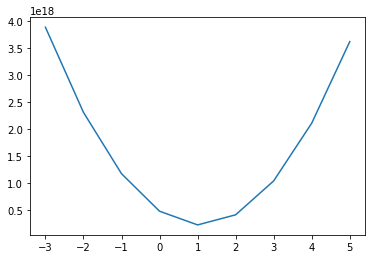

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

m = 1.3
alpha = 0.01
max_iter = 10000
cost = []
m_vals = list(range(-3, 6, 1))

for m in m_vals :
    rss_val = rss(m)
    print("m = {:<8} rss = {:2e}".format(m, rss_val))
    cost.append(rss_val)
    
plt.plot(m_vals, cost)

As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [ ]:
# The algorithm starts at x=1.5
cur_x = 20

# Initialize a step size
alpha = 0.0001

# Initialize a precision
precision = 1e-12

# Helpful initialization
previous_step_size = 1 

# Maximum number of iterations
max_iters = 10000 

# Iteration counter
iters = 0 

# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
while (abs(prev_x - cur_x) > precision and iters < max_iters):
    print('Current value: {} RSS Produced: {}'.format(cur_x, rss(cur_x)))
    prev_x = cur_x
    # Calculate the gradient. This is often done by hand to reduce computational complexity.
    # For here, generate points surrounding your current state, then calculate the rss of these points
    # Finally, use the np.gradient() method on this survey region. 
    # This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - alpha , stop = cur_x + alpha , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    cur_x -= alpha * gradient # Move opposite the gradient
    iters+=1

    
# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)  
print("after", iters, 'iterations...')
print("The local minimum occurs at", cur_x)

Current value: 20 RSS Produced: 79238943056744588340
Current value: 19.90618859014511 RSS Produced: 7.845748996674727e+19
Current value: 19.812378487110138 RSS Produced: 7.767993102514977e+19
Current value: 19.71856971054077 RSS Produced: 7.690626623128245e+19
Current value: 19.624762280654906 RSS Produced: 7.613649558590875e+19
Current value: 19.530956217479705 RSS Produced: 7.537061908489359e+19
Current value: 19.437151542186736 RSS Produced: 7.460863673006082e+19
Current value: 19.34334827566147 RSS Produced: 7.385054851742525e+19
Current value: 19.24954643983841 RSS Produced: 7.309635444795926e+19
Current value: 19.15574605674744 RSS Produced: 7.234605451976714e+19
Current value: 19.061947149038318 RSS Produced: 7.15996487322286e+19
Current value: 18.96814973959923 RSS Produced: 7.085713708285882e+19
Current value: 18.874353852128984 RSS Produced: 7.0118519571753206e+19
Current value: 18.780559510612488 RSS Produced: 6.938379619732212e+19
Current value: 18.68676673941612 RSS Produc

Current value: 8.671998357939717 RSS Produced: 1.2953774986472049e+19
Current value: 8.578860781264302 RSS Produced: 1.2643477978602068e+19
Current value: 8.485743047261234 RSS Produced: 1.233707361248848e+19
Current value: 8.39264589092731 RSS Produced: 1.2034561815393718e+19
Current value: 8.299570083594318 RSS Produced: 1.1735942510181857e+19
Current value: 8.206516435146328 RSS Produced: 1.144121561490411e+19
Current value: 8.113485796618459 RSS Produced: 1.1150381043030751e+19
Current value: 8.020479062485693 RSS Produced: 1.0863438702101996e+19
Current value: 7.927497173738478 RSS Produced: 1.0580388494203927e+19
Current value: 7.83454112074375 RSS Produced: 1.0301230315058147e+19
Current value: 7.741611946463583 RSS Produced: 1.002596405347121e+19
Current value: 7.648710750102995 RSS Produced: 9.75458959125024e+18
Current value: 7.555838690733908 RSS Produced: 9.487106802167837e+18
Current value: 7.462996991467474 RSS Produced: 9.223515551597865e+18
Current value: 7.370186943817

## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

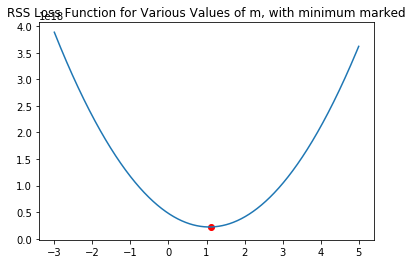

In [52]:
# Your code here
# Your code here
x = np.linspace(start=-3, stop=5, num=10**3)
y = [rss(xi) for xi in x]
plt.plot(x, y)
plt.scatter(1.1124498053361267, rss(1.1124498053361267), c='red')
plt.title('RSS Loss Function for Various Values of m, with minimum marked')
plt.show()

## Summary 

In this lab, you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!